In [3]:
import tensorflow as tf 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt   

## Data Processing 

### Traing image preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
import os

# Assuming data_dir is the path to the folder containing the dataset
data_dir = "Medicinal Leaf dataset"

# Assuming your desired directory is named 'my_dataset_directory'
output_dir = "split dataset"

# List all folders in the dataset directory, each folder represents a class
class_folders = os.listdir(data_dir)

# Initialize empty lists to store filenames and labels
files = []
labels = []

# Iterate over class folders to collect filenames and labels
for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        class_files = os.listdir(class_path)
        files.extend(class_files)
        labels.extend([class_folder] * len(class_files))

# Splitting into training and validation sets while maintaining class distribution
train_files, val_files, train_labels, val_labels = train_test_split(files, labels, test_size=0.2, 
                                                                    stratify=labels, random_state=42)

# Move files to appropriate folders in your directory
for filename, label in zip(train_files, train_labels):
    source_path = os.path.join(data_dir, label, filename)
    destination_path = os.path.join(output_dir, "train", label, filename)
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    os.rename(source_path, destination_path)

for filename, label in zip(val_files, val_labels):
    source_path = os.path.join(data_dir, label, filename)
    destination_path = os.path.join(output_dir, "validation", label, filename)
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    os.rename(source_path, destination_path)

print("Files moved successfully to your directory.")


Files moved successfully to your directory.


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'split dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6900 files belonging to 80 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'split dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1380 files belonging to 80 classes.


In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[124.32056   120.83618    95.38306  ]
   [ 94.95166    96.7605     92.521484 ]
   [ 88.04443    90.24414    94.95508  ]
   ...
   [145.26733    97.84546    62.423584 ]
   [128.2771    107.648926   91.92969  ]
   [ 57.617188   63.576904   63.697754 ]]

  [[ 96.0625     93.57764    79.73389  ]
   [ 89.84375    93.390625   93.27197  ]
   [ 79.48218    84.193115   87.90405  ]
   ...
   [142.51318    97.864746   63.263184 ]
   [122.99512    98.30908    77.016846 ]
   [ 90.727295   94.31738    89.64868  ]]

  [[ 82.098145   80.67798    80.05127  ]
   [ 87.85132    92.39819    96.963135 ]
   [ 87.043945   94.17676    97.17676  ]
   ...
   [137.85522   109.3374     86.768555 ]
   [113.32373   104.414795   90.464355 ]
   [ 43.52588    53.210693   48.69409  ]]

  ...

  [[ 78.446045   75.446045   68.446045 ]
   [ 56.23535    64.87598    41.956787 ]
   [158.0957    176.61768   126.04028  ]
   ...
   [ 43.51416    51.976562   45.147705 ]
   [ 49.926758   55.773438   49.78369  ]
   [ 

## Building model


In [6]:
from tensorflow.keras.layers import Conv2D ,Dense , MaxPool2D ,Flatten
from tensorflow.keras.models import Sequential

In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[128,128,3]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1500,activation='relu'),
    tf.keras.layers.Dense(units=80,activation='softmax'),
])

## Building Convolutional layers

In [7]:
# model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
# model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
# model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
# model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
# model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
# model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
# model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
# model.add(tf.keras.layers.Dropout(0.25))

In [13]:
# model.add(tf.keras.layers.Flatten())

In [14]:
# model.add(Dense(units=1500,activation='relu'))

In [15]:
# model.add(tf.keras.layers.Dropout(0.4))


In [16]:
# model.add(Dense(units=80 ,activation='softmax'))

## compile model

In [21]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 1500)              190513500 
                                                                 
 dense_5 (Dense)             (None, 80)                120080    
                                                                 
Total params: 190634476 (727.21 MB)
Trainable params: 190634476 (727.21 MB)
Non-trainable params: 0 (0.00 Byte)
________

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
216/216 [==============================] - 974s 4s/step - loss: 697.0039 - accuracy: 0.0962 - val_loss: 2.8404 - val_accuracy: 0.5913
Epoch 2/10
209/216 [============================>.] - ETA: 1:14 - loss: 2.7987 - accuracy: 0.5577

## model evalutaion

In [19]:
train_loss,train_acc =model.evaluate(training_set)


216/216 [==============================] - 307s 1s/step - loss: 0.3853 - accuracy: 0.8867


In [20]:
print(train_acc,train_acc)

0.8866666555404663 0.8866666555404663


In [21]:
val_loss,val_acc=model.evaluate(validation_set)

44/44 [==============================] - 63s 1s/step - loss: 0.3991 - accuracy: 0.8761


In [22]:
print(val_loss,val_acc)

0.3991124629974365 0.876086950302124


## saving model

In [23]:
model.save("trained.keras")

In [24]:
training_history.history

{'loss': [4.2271647453308105,
  3.6388039588928223,
  3.116753101348877,
  2.6192193031311035,
  2.222730875015259,
  1.8784857988357544,
  1.562089443206787,
  1.2683765888214111,
  1.0604530572891235,
  0.8938414454460144],
 'accuracy': [0.04492753744125366,
  0.12202898412942886,
  0.22014492750167847,
  0.3228985369205475,
  0.40710145235061646,
  0.483768105506897,
  0.5634782314300537,
  0.6284058094024658,
  0.6973913311958313,
  0.7297101616859436],
 'val_loss': [3.863999128341675,
  3.345219373703003,
  2.550778865814209,
  2.0702695846557617,
  1.6659510135650635,
  1.362160086631775,
  1.0629491806030273,
  0.7421900033950806,
  0.5151922106742859,
  0.39911243319511414],
 'val_accuracy': [0.09420289844274521,
  0.17536231875419617,
  0.34057971835136414,
  0.458695650100708,
  0.5579710006713867,
  0.6166666746139526,
  0.6920289993286133,
  0.7971014380455017,
  0.8514492511749268,
  0.876086950302124]}

In [25]:
## recording my history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## accuracy visualization

In [30]:
epochs=[i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
training_history.history['accuracy']

[0.04492753744125366,
 0.12202898412942886,
 0.22014492750167847,
 0.3228985369205475,
 0.40710145235061646,
 0.483768105506897,
 0.5634782314300537,
 0.6284058094024658,
 0.6973913311958313,
 0.7297101616859436]

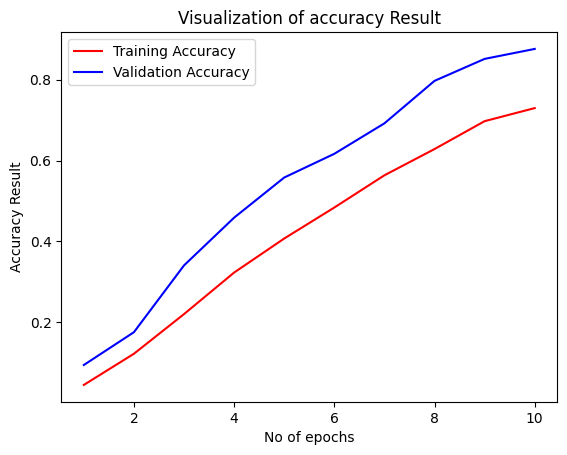

In [32]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label="Training Accuracy")
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label="Validation Accuracy")
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of accuracy Result")
plt.legend()
plt.show()

In [33]:
class_name=validation_set.class_names
class_name

['Aloevera',
 'Amla',
 'Amruthaballi',
 'Arali',
 'Astma_weed',
 'Badipala',
 'Balloon_Vine',
 'Bamboo',
 'Beans',
 'Betel',
 'Bhrami',
 'Bringaraja',
 'Caricature',
 'Castor',
 'Catharanthus',
 'Chakte',
 'Chilly',
 'Citron lime (herelikai)',
 'Coffee',
 'Common rue(naagdalli)',
 'Coriender',
 'Curry',
 'Doddpathre',
 'Drumstick',
 'Ekka',
 'Eucalyptus',
 'Ganigale',
 'Ganike',
 'Gasagase',
 'Ginger',
 'Globe Amarnath',
 'Guava',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jackfruit',
 'Jasmine',
 'Kambajala',
 'Kasambruga',
 'Kohlrabi',
 'Lantana',
 'Lemon',
 'Lemongrass',
 'Malabar_Nut',
 'Malabar_Spinach',
 'Mango',
 'Marigold',
 'Mint',
 'Neem',
 'Nelavembu',
 'Nerale',
 'Nooni',
 'Onion',
 'Padri',
 'Palak(Spinach)',
 'Papaya',
 'Parijatha',
 'Pea',
 'Pepper',
 'Pomoegranate',
 'Pumpkin',
 'Raddish',
 'Rose',
 'Sampige',
 'Sapota',
 'Seethaashoka',
 'Seethapala',
 'Spinach1',
 'Tamarind',
 'Taro',
 'Tecoma',
 'Thumbe',
 'Tomato',
 'Tulsi',
 'Turmeric',
 'ashoka',
 'camphor',
 

In [34]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'split dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1380 files belonging to 80 classes.


In [35]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

44/44 [==============================] - 73s 2s/step


(array([[9.9992025e-01, 1.0284569e-11, 1.7597717e-11, ..., 7.1785126e-12,
         2.1167922e-10, 1.4728586e-12],
        [9.9999571e-01, 1.2111586e-15, 6.6278107e-12, ..., 6.6032939e-12,
         2.2221949e-12, 6.7162407e-16],
        [1.0000000e+00, 3.3558370e-22, 6.0185390e-17, ..., 2.4625841e-14,
         1.2010372e-15, 7.7352268e-21],
        ...,
        [1.6062301e-04, 6.1450244e-08, 1.4919245e-04, ..., 4.8739780e-06,
         6.7955654e-07, 9.5865750e-01],
        [1.9386000e-05, 7.5777635e-08, 2.7129371e-04, ..., 7.5259487e-07,
         1.0325798e-05, 9.7429264e-01],
        [1.0592249e-06, 4.6704921e-05, 7.3569821e-04, ..., 4.1780827e-04,
         6.7406560e-05, 5.7858539e-01]], dtype=float32),
 (1380, 80))

In [36]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(1380,), dtype=int64, numpy=array([ 0,  0,  0, ..., 79, 79, 79], dtype=int64)>

In [38]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1380, 80), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [39]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(1380,), dtype=int64, numpy=array([ 0,  0,  0, ..., 79, 79, 79], dtype=int64)>

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
classification_report(y_true,predicted_categories,target_names=class_name)

'                         precision    recall  f1-score   support\n\n               Aloevera       1.00      1.00      1.00        24\n                   Amla       0.58      0.85      0.69        13\n           Amruthaballi       0.93      0.72      0.81        18\n                  Arali       0.95      1.00      0.97        18\n             Astma_weed       0.68      0.94      0.79        16\n               Badipala       1.00      0.47      0.64        15\n           Balloon_Vine       0.82      0.75      0.78        12\n                 Bamboo       0.88      0.96      0.92        24\n                  Beans       0.89      0.84      0.86        19\n                  Betel       0.88      0.96      0.92        23\n                 Bhrami       1.00      0.90      0.95        21\n             Bringaraja       0.74      0.93      0.82        15\n             Caricature       1.00      1.00      1.00        15\n                 Castor       0.92      0.92      0.92        26\n       

In [42]:
cm=confusion_matrix(y_true,predicted_categories)
cm.shape

(80, 80)

In [43]:
cm

array([[24,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0, 13]], dtype=int64)

## confusioin metrics visualization

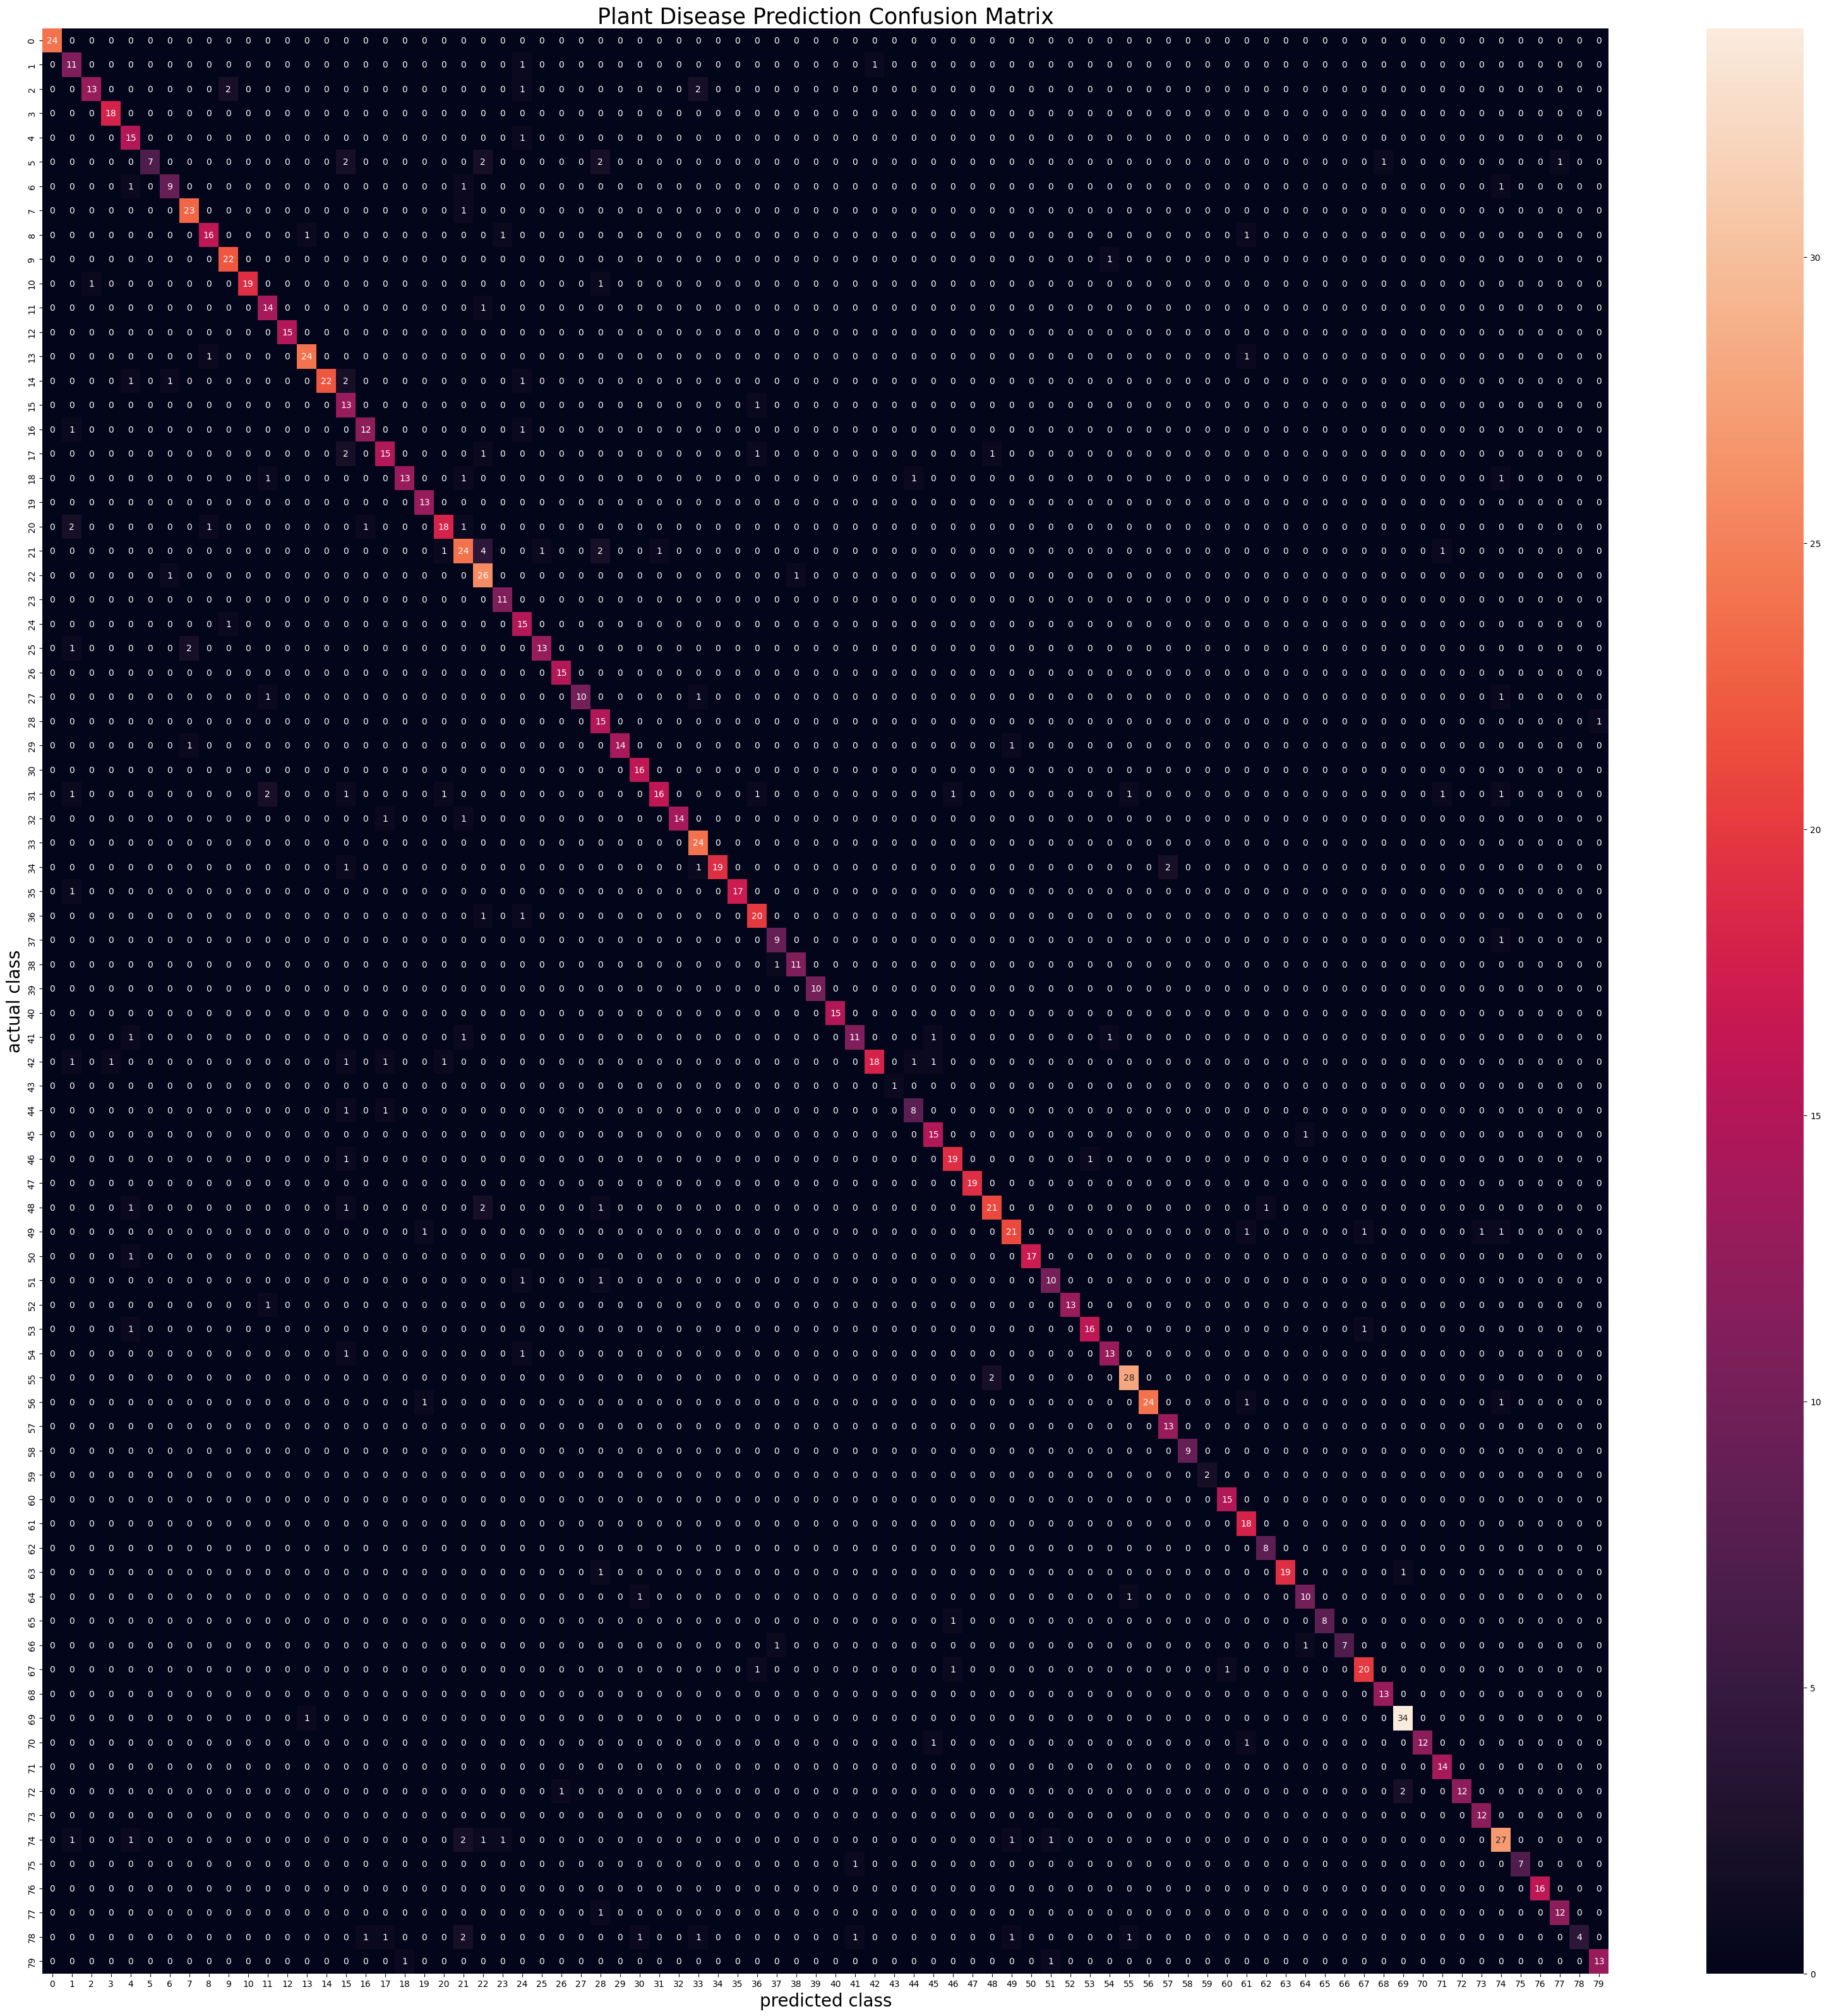

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm , annot=True,annot_kws={'size':10})
plt.xlabel("predicted class",fontsize=20)
plt.ylabel("actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()